In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
s=pd.read_csv('/content/drive/MyDrive/Tuhin_1370_Final/Titanic - Machine Learning from Disaster.csv')

In [ ]:
s

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Tuhin_1370_Final/Titanic - Machine Learning from Disaster.csv')
print("Shape:", df.shape)
df.head()

Shape: (418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
data = df.copy()

# Remove duplicates
data = data.drop_duplicates()

# Fill missing values
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Fare'].fillna(data['Fare'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Drop Cabin (too many missing)
if 'Cabin' in data.columns:
    data.drop(columns=['Cabin'], inplace=True)

data.isnull().sum()

/tmp/ipython-input-3510454086.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
/tmp/ipython-input-3510454086.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Embarked,0


In [ ]:
drop_cols = ['PassengerId','Ticket','Name']
for col in drop_cols:
    if col in data.columns:
        data.drop(columns=[col], inplace=True)

data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [ ]:
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])

# One-hot for Embarked
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)

data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,3,1,34.5,0,0,7.8292,True,False
1,3,0,47.0,1,0,7.0000,False,True
2,2,1,62.0,0,0,9.6875,True,False
3,3,1,27.0,0,0,8.6625,False,True
4,3,0,22.0,1,1,12.2875,False,True


In [ ]:
# Separate features and target
X = data.drop('Sex', axis=1)
y = data['Sex']

# Standard Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train–Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.20,
    random_state=42,
    stratify=y
)

X_train.shape, X_test.shape

((334, 7), (84, 7))

In [ ]:
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)

    print(f"\n===== {model_name} =====")
    print("Classification Report:\n", classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{model_name} - Confusion Matrix")
    plt.show()


===== Logistic Regression =====
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.26      0.35        31
           1       0.67      0.87      0.75        53

    accuracy                           0.64        84
   macro avg       0.60      0.56      0.55        84
weighted avg       0.62      0.64      0.60        84



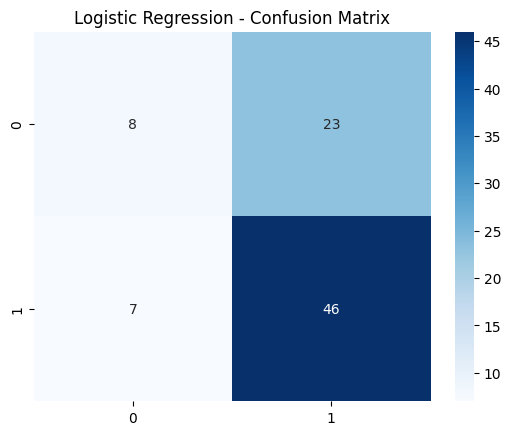

In [ ]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
evaluate_model(log_model, X_test, y_test, "Logistic Regression")


===== KNN =====
Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.26      0.33        31
           1       0.66      0.83      0.73        53

    accuracy                           0.62        84
   macro avg       0.56      0.54      0.53        84
weighted avg       0.59      0.62      0.59        84



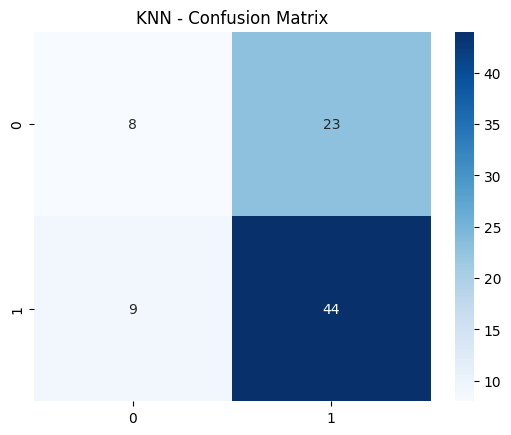

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
evaluate_model(knn, X_test, y_test, "KNN")


===== Decision Tree =====
Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.61      0.54        31
           1       0.73      0.60      0.66        53

    accuracy                           0.61        84
   macro avg       0.60      0.61      0.60        84
weighted avg       0.63      0.61      0.61        84



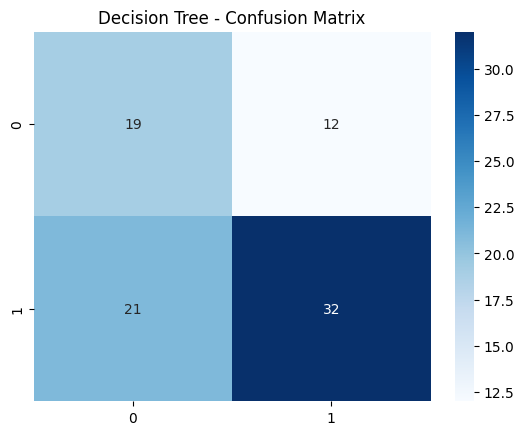

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
evaluate_model(dt, X_test, y_test, "Decision Tree")


===== Random Forest =====
Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.45      0.47        31
           1       0.69      0.72      0.70        53

    accuracy                           0.62        84
   macro avg       0.59      0.58      0.59        84
weighted avg       0.61      0.62      0.62        84



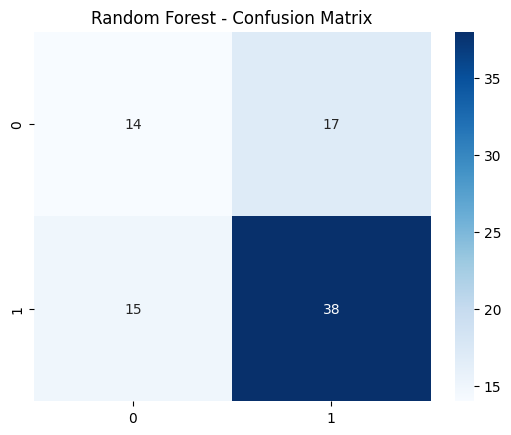

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
evaluate_model(rf, X_test, y_test, "Random Forest")


===== SVM =====
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.35      0.44        31
           1       0.69      0.85      0.76        53

    accuracy                           0.67        84
   macro avg       0.64      0.60      0.60        84
weighted avg       0.65      0.67      0.64        84



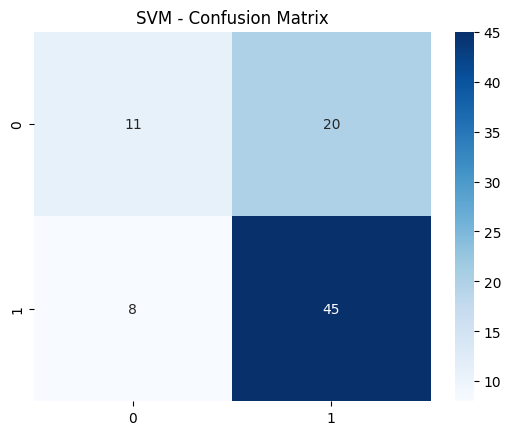

In [ ]:
svm = SVC(probability=True)
svm.fit(X_train, y_train)
evaluate_model(svm, X_test, y_test, "SVM")

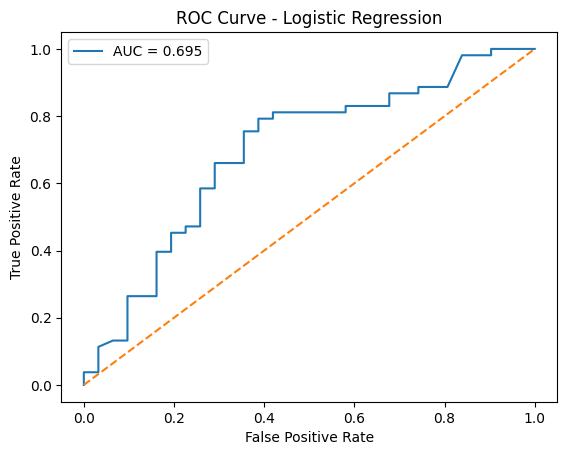

In [ ]:
y_pred_prob = log_model.predict_proba(X_test)[:,1]

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()

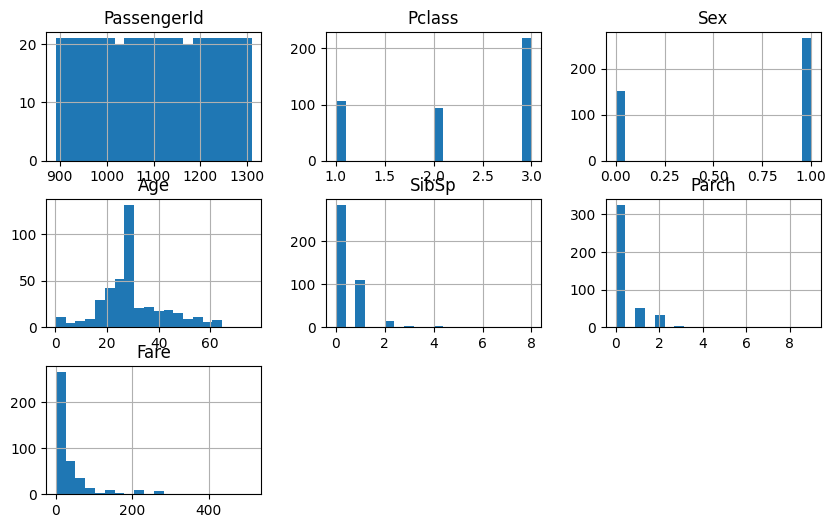

In [ ]:
df.hist(bins=20, figsize=(10,6))
plt.show()

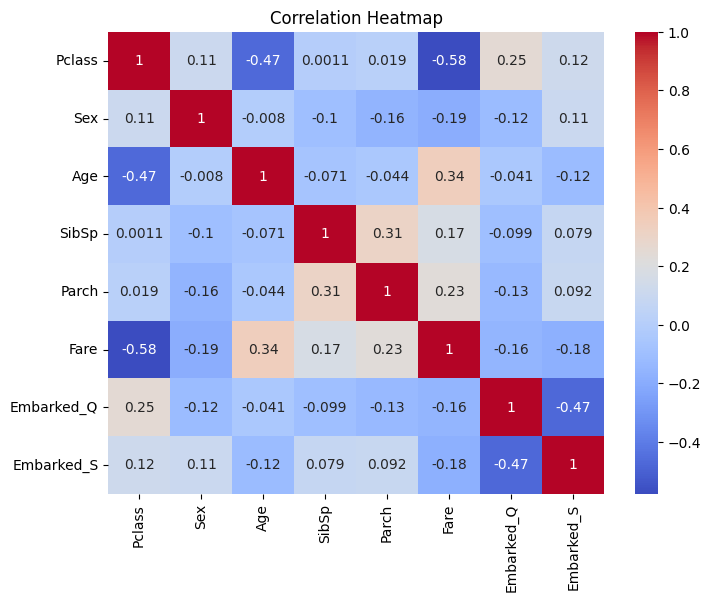

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

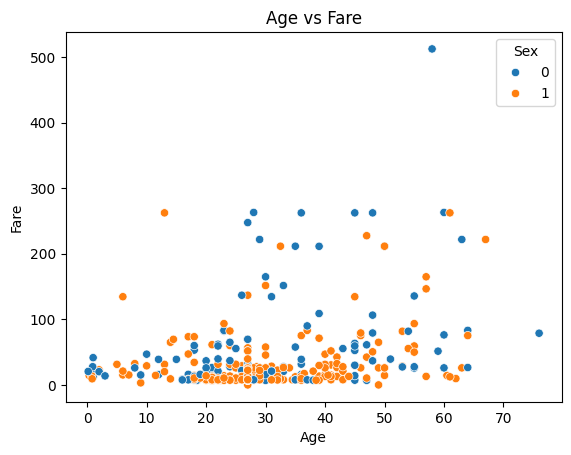

In [ ]:
sns.scatterplot(data=data, x='Age', y='Fare', hue='Sex')
plt.title("Age vs Fare")
plt.show()